In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from rom_am import ParDMD, ParROM
import matplotlib.pyplot as plt
import time
import scipy.interpolate as si

## Loading and interpolating data for the 6 parameters

In [2]:
fl_rho_v_1 = np.load("../DATA/Parametric/nln_results_coeff_1/nln_fl_rho_v_coeff_1.npy")
fl_rho_1 = np.load("../DATA/Parametric/nln_results_coeff_1/nln_fl_rho_coeff_1.npy")
moving_mesh_1 = np.load("../DATA/Parametric/nln_results_coeff_1/nln_moving_mesh_coeff_1.npy")
delta_t_1 = np.load("../DATA/Parametric/nln_results_coeff_1/nln_delta_t_coeff_1.npy")
fl_velocity_1 = fl_rho_v_1/fl_rho_1
fl_prs_1 = np.load("../DATA/Parametric/nln_results_coeff_1/nln_fl_pressure_coeff_1.npy")
nt_1 = fl_rho_v_1.shape[0]
t_1 = np.cumsum(delta_t_1)

# Choose number of equally spaced timesteps 
n_T = 2.5 # ~ Number of modes in data
n_snap = 120 # Number of snapshots in the train data
frac = 2 # ~ Number of time periods in the train data
ntt = int(n_snap /(frac/n_T)) # Number of snapshots in the test+train data
dt = (t_1[-1] - t_1[0]) / (ntt - 1)
Coeff = frac/n_T

# Interpolating original data to the new timesteps
target_t = np.linspace(t_1[0], t_1[-1], ntt)
target_fl_m_mesh_1 = si.griddata(t_1, moving_mesh_1.T, target_t, method='linear').T
target_velocity_1 = si.griddata(t_1, fl_velocity_1.T, target_t, method='linear').T
target_prs_1 = si.griddata(t_1, fl_prs_1.T, target_t, method='linear').T

train_velocity_1 = target_velocity_1[:, :int(Coeff*ntt)]
train_prs_1 = target_prs_1[:, :int(Coeff*ntt)]
train_mesh_1 = target_fl_m_mesh_1[:, :int(Coeff*ntt)]
train_t = target_t[:int(Coeff*ntt)]

test_velocity_1 = target_velocity_1[:, int(Coeff*ntt)::]
test_mesh_1 = target_fl_m_mesh_1[:, int(Coeff*ntt)::]
test_prs_1 = target_prs_1[:, int(Coeff*ntt)::]
test_t = target_t[int(Coeff*ntt)::]

In [3]:
fl_rho_v_2 = np.load("../DATA/Parametric/nln_results_coeff_2/nln_fl_rho_v.npy")
fl_rho_2 = np.load("../DATA/Parametric/nln_results_coeff_2/nln_fl_rho.npy")
moving_mesh_2 = np.load("../DATA/Parametric/nln_results_coeff_2/nln_moving_mesh.npy")
delta_t_2 = np.load("../DATA/Parametric/nln_results_coeff_2/nln_delta_t.npy")
fl_velocity_2 = fl_rho_v_2/fl_rho_2
fl_prs_2 = np.load("../DATA/Parametric/nln_results_coeff_2/nln_fl_pressure.npy")
nt_2 = fl_rho_v_2.shape[0]
t_2 = np.cumsum(delta_t_2)

# Interpolating original data to the new timesteps
target_fl_m_mesh_2 = si.griddata(t_2, moving_mesh_2.T, target_t, method='linear').T
target_velocity_2 = si.griddata(t_2, fl_velocity_2.T, target_t, method='linear').T
target_prs_2 = si.griddata(t_2, fl_prs_2.T, target_t, method='linear').T

train_velocity_2 = target_velocity_2[:, :int(Coeff*ntt)]
train_mesh_2 = target_fl_m_mesh_2[:, :int(Coeff*ntt)]
train_prs_2 = target_prs_2[:, :int(Coeff*ntt)]

test_velocity_2 = target_velocity_2[:, int(Coeff*ntt)::]
test_prs_2 = target_prs_2[:, int(Coeff*ntt)::]
test_mesh_2 = target_fl_m_mesh_2[:, int(Coeff*ntt)::]

In [4]:
fl_rho_v_3 = np.load("../DATA/Parametric/nln_results_coeff_3/nln_fl_rho_v_coeff_3.npy")
fl_rho_3 = np.load("../DATA/Parametric/nln_results_coeff_3/nln_fl_rho_coeff_3.npy")
moving_mesh_3 = np.load("../DATA/Parametric/nln_results_coeff_3/nln_moving_mesh_coeff_3.npy")
delta_t_3 = np.load("../DATA/Parametric/nln_results_coeff_3/nln_delta_t_coeff_3.npy")
fl_prs_3 = np.load("../DATA/Parametric/nln_results_coeff_3/nln_fl_pressure_coeff_3.npy")
fl_velocity_3 = fl_rho_v_3/fl_rho_3
nt_3 = fl_rho_v_3.shape[0]
t_3 = np.cumsum(delta_t_3)

# Interpolating original data to the new timesteps
target_fl_m_mesh_3 = si.griddata(t_3, moving_mesh_3.T, target_t, method='linear').T
target_velocity_3 = si.griddata(t_3, fl_velocity_3.T, target_t, method='linear').T
target_prs_3 = si.griddata(t_3, fl_prs_3.T, target_t, method='linear').T

train_velocity_3 = target_velocity_3[:, :int(Coeff*ntt)]
train_mesh_3 = target_fl_m_mesh_3[:, :int(Coeff*ntt)]
train_prs_3 = target_prs_3[:, :int(Coeff*ntt)]

test_velocity_3 = target_velocity_3[:, int(Coeff*ntt)::]
test_prs_3 = target_prs_3[:, int(Coeff*ntt)::]
test_mesh_3 = target_fl_m_mesh_3[:, int(Coeff*ntt)::]

In [5]:
fl_rho_v_4 = np.load("../DATA/Parametric/nln_results_coeff_4/nln_fl_rho_v_coeff_4.npy")
fl_rho_4 = np.load("../DATA/Parametric/nln_results_coeff_4/nln_fl_rho_coeff_4.npy")
moving_mesh_4 = np.load("../DATA/Parametric/nln_results_coeff_4/nln_moving_mesh_coeff_4.npy")
delta_t_4 = np.load("../DATA/Parametric/nln_results_coeff_4/nln_delta_t_coeff_4.npy")
fl_velocity_4 = fl_rho_v_4/fl_rho_4
fl_prs_4 = np.load("../DATA/Parametric/nln_results_coeff_4/nln_fl_pressure_coeff_4.npy")
nt_4 = fl_rho_v_4.shape[0]
t_4 = np.cumsum(delta_t_4)

# Interpolating original data to the new timesteps
target_fl_m_mesh_4 = si.griddata(t_4, moving_mesh_4.T, target_t, method='linear').T
target_velocity_4 = si.griddata(t_4, fl_velocity_4.T, target_t, method='linear').T
target_prs_4 = si.griddata(t_4, fl_prs_4.T, target_t, method='linear').T

train_velocity_4 = target_velocity_4[:, :int(Coeff*ntt)]
train_mesh_4 = target_fl_m_mesh_4[:, :int(Coeff*ntt)]
train_prs_4 = target_prs_4[:, :int(Coeff*ntt)]

test_velocity_4 = target_velocity_4[:, int(Coeff*ntt)::]
test_prs_4 = target_prs_4[:, int(Coeff*ntt)::]
test_mesh_4 = target_fl_m_mesh_4[:, int(Coeff*ntt)::]

In [6]:
fl_rho_v_5 = np.load("../DATA/Parametric/nln_results_coeff_5/nln_fl_rho_v_coeff_5.npy")
fl_rho_5 = np.load("../DATA/Parametric/nln_results_coeff_5/nln_fl_rho_coeff_5.npy")
moving_mesh_5 = np.load("../DATA/Parametric/nln_results_coeff_5/nln_moving_mesh_coeff_5.npy")
delta_t_5 = np.load("../DATA/Parametric/nln_results_coeff_5/nln_delta_t_coeff_5.npy")
fl_velocity_5 = fl_rho_v_5/fl_rho_5
fl_prs_5 = np.load("../DATA/Parametric/nln_results_coeff_5/nln_fl_pressure_coeff_5.npy")
nt_5 = fl_rho_v_5.shape[0]
t_5 = np.cumsum(delta_t_5)

# Interpolating original data to the new timesteps
target_fl_m_mesh_5 = si.griddata(t_5, moving_mesh_5.T, target_t, method='linear').T
target_velocity_5 = si.griddata(t_5, fl_velocity_5.T, target_t, method='linear').T
target_prs_5 = si.griddata(t_5, fl_prs_5.T, target_t, method='linear').T

train_velocity_5 = target_velocity_5[:, :int(Coeff*ntt)]
train_mesh_5 = target_fl_m_mesh_5[:, :int(Coeff*ntt)]
train_prs_5 = target_prs_5[:, :int(Coeff*ntt)]

test_velocity_5 = target_velocity_5[:, int(Coeff*ntt)::]
test_prs_5 = target_prs_5[:, int(Coeff*ntt)::]
test_mesh_5 = target_fl_m_mesh_5[:, int(Coeff*ntt)::]

In [7]:
fl_rho_v_6 = np.load("../DATA/Parametric/nln_results_coeff_6//nln_fl_rho_v.npy")
fl_rho_6 = np.load("../DATA/Parametric/nln_results_coeff_6/nln_fl_rho.npy")
moving_mesh_6 = np.load("../DATA/Parametric/nln_results_coeff_6/nln_moving_mesh.npy")
delta_t_6 = np.load("../DATA/Parametric/nln_results_coeff_6/nln_delta_t.npy")
fl_velocity_6 = fl_rho_v_6/fl_rho_6
fl_prs_6 = np.load("../DATA/Parametric/nln_results_coeff_6/nln_fl_pressure.npy")
nt_6 = fl_rho_v_6.shape[0]
t_6 = np.cumsum(delta_t_6)

# Interpolating original data to the new timesteps
target_fl_m_mesh_6 = si.griddata(t_6, moving_mesh_6.T, target_t, method='linear').T
target_velocity_6 = si.griddata(t_6, fl_velocity_6.T, target_t, method='linear').T
target_prs_6 = si.griddata(t_6, fl_prs_6.T, target_t, method='linear').T

train_velocity_6 = target_velocity_6[:, :int(Coeff*ntt)]
train_mesh_6 = target_fl_m_mesh_6[:, :int(Coeff*ntt)]
train_prs_6 = target_prs_6[:, :int(Coeff*ntt)]

test_velocity_6 = target_velocity_6[:, int(Coeff*ntt)::]
test_prs_6 = target_prs_6[:, int(Coeff*ntt)::]
test_mesh_6 = target_fl_m_mesh_6[:, int(Coeff*ntt)::]

and the testing case for $\mu = 3.5$

In [8]:
fl_rho_v_35 = np.load("../DATA/Parametric/nln_results_coeff_35/nln_fl_rho_v_coeff_35.npy")
fl_rho_35 = np.load("../DATA/Parametric/nln_results_coeff_35/nln_fl_rho_coeff_35.npy")
moving_mesh_35 = np.load("../DATA/Parametric/nln_results_coeff_35/nln_moving_mesh_coeff_35.npy")
delta_t_35 = np.load("../DATA/Parametric/nln_results_coeff_35/nln_delta_t_coeff_35.npy")
fl_prs_35 = np.load("../DATA/Parametric/nln_results_coeff_35/nln_fl_pressure_coeff_35.npy")
fl_velocity_35 = fl_rho_v_35/fl_rho_35
nt_35 = fl_rho_v_35.shape[0]
t_35 = np.cumsum(delta_t_35)

# Interpolating original data to the new timesteps
target_fl_m_mesh_35 = si.griddata(t_35, moving_mesh_35.T, target_t, method='linear').T
target_velocity_35 = si.griddata(t_35, fl_velocity_35.T, target_t, method='linear').T
target_prs_35 = si.griddata(t_35, fl_prs_35.T, target_t, method='linear').T

train_velocity_35 = target_velocity_35[:, :int(Coeff*ntt)]
train_mesh_35 = target_fl_m_mesh_35[:, :int(Coeff*ntt)]
train_prs_35 = target_prs_35[:, :int(Coeff*ntt)]

test_velocity_35 = target_velocity_35[:, int(Coeff*ntt)::]
test_prs_35 = target_prs_35[:, int(Coeff*ntt)::]
test_mesh_35 = target_fl_m_mesh_35[:, int(Coeff*ntt)::]

In [9]:
nx = fl_velocity_1.shape[0]
L = 1
L0 = 1
mass = 1000
rigid = 1e7
Ls0 = 1.2

## DMD decomposition on 5 parameters  {1, 2, 3, 4, 5, 6}

In [10]:
X = np.vstack(( np.hstack((train_velocity_1, train_velocity_2, train_velocity_3, train_velocity_4, train_velocity_5, train_velocity_6)), 
              np.hstack((train_mesh_1, train_mesh_2, train_mesh_3, train_mesh_4, train_mesh_5, train_mesh_6)), 
              np.hstack((train_prs_1, train_prs_2, train_prs_3, train_prs_4, train_prs_5, train_prs_6))))

X = X.swapaxes(0, 1).reshape((6, train_t.shape[0], 3*nx),).swapaxes(1, 2)

In [11]:
pard = ParDMD()
muROM = ParROM(pard)
train_params = np.array([1., 2., 3., 4., 5., 6.])[np.newaxis, :]

muROM.decompose(X = X, params = train_params, dt = dt, normalize = True, rank = 30)

## Parametric DMD prediction for $\mu = 3.5$

In [12]:
test_mu = np.array([[3.5]])
pred_t = target_t.copy()

result_ = np.real(muROM.predict(pred_t, test_mu, t1 = t_1[0], stabilize=True))

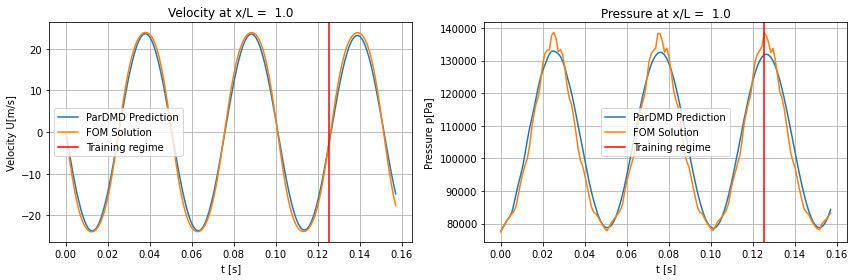

In [13]:
node = 1
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(pred_t, result_[nx-node, :], label = "ParDMD Prediction");
ax[0].plot(target_t, target_velocity_35[-node, :], label = "FOM Solution");
ax[0].grid();
ax[0].set_xlabel("t [s]");
ax[0].set_ylabel("Velocity U[m/s]");
ax[0].set_title("Velocity at x/L =  " + str(L * (nx - node + 1)/nx));
ax[0].axvline(train_t[-1], color = 'r', label = "Training regime");
ax[0].legend();

ax[1].plot(pred_t, result_[3*nx-node, :], label = "ParDMD Prediction");
ax[1].plot(target_t, target_prs_35[-node, :], label = "FOM Solution");
ax[1].grid();
ax[1].set_xlabel("t [s]");
ax[1].set_ylabel("Pressure p[Pa]");
ax[1].set_title("Pressure at x/L =  " + str(L * (nx - node + 1)/nx));
ax[1].axvline(train_t[-1], color = 'r', label = "Training regime");
ax[1].legend();

fig.tight_layout();

In [14]:
print("Training time, t = ", muROM.profile["Training time"], " s")
print("Prediction time, t = ", muROM.profile["Prediction time"], " s")

Training time, t =  0.6903386116027832  s
Prediction time, t =  0.0518186092376709  s


In [15]:
print('The accuracy on mu=', str(test_mu[0][0]), 'is ',100*muROM.get_accuracy(target_t, test_mu, np.vstack((target_velocity_35, target_fl_m_mesh_35, target_prs_35)), t1=t_1[0]), " %")

The accuracy on mu= 3.5 is  2.607997185814656  %


## Using the manifold interpolation approach

In [16]:
from rom_am import ManDMD

In [17]:
mndmd = ManDMD()
muROM2 = ParROM(mndmd)
train_params = np.array([1., 2., 3., 4., 5., 6.])[np.newaxis, :]

muROM2.decompose(X = X, params = train_params, dt = dt, normalize = True, rank = 30, iref=1, method=4)

In [18]:
test_mu = np.array([[3.]])
pred_t = target_t.copy()
init = np.vstack((train_velocity_3, train_mesh_3, train_prs_3))
init = init/muROM2.snap_norms[:, np.newaxis]
init = init[:, 1]

#result2 = np.real(muROM2.predict(pred_t, test_mu, method = 1, t1 = t_1[1], init=init, stabilize=True, cutoff = .93))
result2 = np.real(muROM2.predict(pred_t, test_mu, method = 14, t1 = t_1[1], init=init, stabilize=True, cutoff = .93))

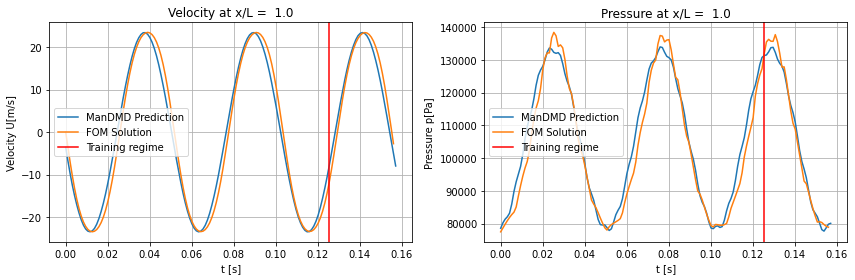

In [19]:
node = 1
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(pred_t, result2[nx-node, :], label = "ManDMD Prediction");
ax[0].plot(target_t, target_velocity_3[-node, :], label = "FOM Solution");
ax[0].grid();
ax[0].set_xlabel("t [s]");
ax[0].set_ylabel("Velocity U[m/s]");
ax[0].set_title("Velocity at x/L =  " + str(L * (nx - node + 1)/nx));
ax[0].axvline(train_t[-1], color = 'r', label = "Training regime");
ax[0].legend();

ax[1].plot(pred_t, result2[3*nx-node, :], label = "ManDMD Prediction");
ax[1].plot(target_t, target_prs_3[-node, :], label = "FOM Solution");
ax[1].grid();
ax[1].set_xlabel("t [s]");
ax[1].set_ylabel("Pressure p[Pa]");
ax[1].set_title("Pressure at x/L =  " + str(L * (nx - node + 1)/nx));
ax[1].axvline(train_t[-1], color = 'r', label = "Training regime");
ax[1].legend();

fig.tight_layout();

## A parametric ODE example

In [20]:
import scipy.interpolate as si
from scipy.integrate import solve_ivp
from rom_am import ManDMD

In [24]:
## ======================= Creating the HF Data ==============================
px = 10
p = px**2
N = 3
T = 290
dt = 0.04
m = int(T/dt)

def create_data(lambdd = -0.35, mu = -0.03, dt = 0.06):
    oper = np.array([[mu, 0., 0.], [0., lambdd, -lambdd], [0., 0, 2*mu]])
    input_t = np.arange(0, T, dt)
    init_data = np.array([2, -1])
    nonlinobs_init = np.array([init_data[0], init_data[1], init_data[0]**2])
    
    def f(t, y): return oper @ y
    sol = solve_ivp(f, [0, input_t[-1]], nonlinobs_init, t_eval = input_t)
    input_data = sol.y.copy()
    
    return input_data


lams = np.linspace(-1., -0.35, px)
mus = np.linspace(-.05, -.03, px)

lambdd, mu = np.meshgrid(lams, mus)
params = np.vstack((lambdd.ravel()[np.newaxis, :], mu.ravel()[np.newaxis, :]))
X = np.empty((p, 3, m))

for i in range(p):
    X[i, :, :] = create_data(params[0, i], params[1, i], dt)

In [22]:
## Picking a test sample ----------
test_param = params[:, 12][:, np.newaxis]
test_X = X[12, :, :]

In [25]:
mdmd = ManDMD()
prom = ParROM(mdmd)
prom.decompose(X = X, params = params, dt = dt, normalize=True, iref = 0, kernel = "cubic", method = 4)

"""
test_param = params[:, 12][:, np.newaxis]
test_X = X[12, :, :]
"""

'\ntest_param = params[:, 12][:, np.newaxis]\ntest_X = X[12, :, :]\n'

In [28]:
pred_t = np.arange(0, 290, dt)
init_test = (test_X[:, :]/prom.snap_norms[:, np.newaxis])[:, 0]
pred = np.real(prom.predict(t = pred_t, mu = test_param, method = 14, init = init_test))

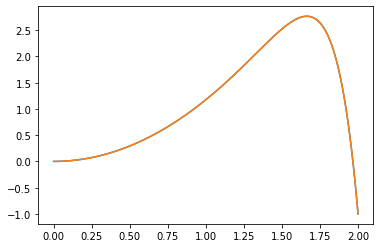

In [29]:
plt.plot(pred[0, :], pred[1, :]);
plt.plot(test_X[0, :], test_X[1, :]);

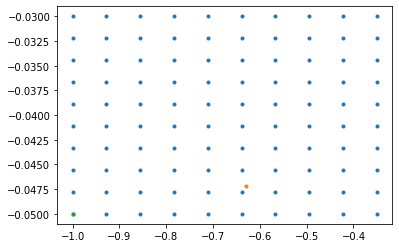

In [30]:
plt.plot(params[0, :], params[1, :], '.');
plt.plot(test_param[0, 0], test_param[1, 0], '.');
plt.plot(params[0, 0], params[1, 0], '.');